# Stats problem set Tres

In [57]:
import pandas
import numpy as np
from math import sqrt, factorial
from scipy.stats import binom, ttest_ind, mannwhitneyu, chisquare, linregress
import operator

import matplotlib.pyplot as plt

MY_TITANIC_TRAIN ='./sample_data/train.csv'
df = pandas.read_csv(MY_TITANIC_TRAIN)
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


## Problem 1: 

### Did survivors pay more for their ticket than people who died? :(

#### Identify and name our distributions.

In [58]:
survivor_fare_distribution = df[df.Survived == 1].Fare
nonsurvivor_fare_distribution = df[df.Survived == 0].Fare

#### To visualize the distributions, we use a histogram.

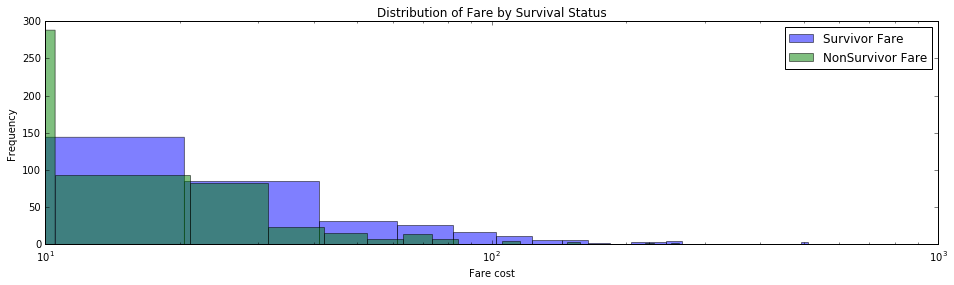

In [59]:
%matplotlib inline

plt.figure(figsize=(16, 4))
plt.hist(survivor_fare_distribution, bins=25, alpha=0.5, label="Survivor Fare")
plt.hist(nonsurvivor_fare_distribution, bins=25, alpha=0.5, label="NonSurvivor Fare")
plt.legend()
plt.xlabel("Fare cost")
plt.ylabel("Frequency")
plt.title("Distribution of Fare by Survival Status")
plt.xscale('log')
plt.show()

In [60]:
avg_survivor_fare = survivor_fare_distribution.mean()
avg_nonsurvivor_fare = nonsurvivor_fare_distribution.mean()
print('On average, survivors paid {}; on average, nonsurvivors paid {}. The difference is {}.'.format(np.round(avg_survivor_fare, 2), 
                                                                                                     np.round(avg_nonsurvivor_fare, 2), 
                                                                                                     np.round(avg_survivor_fare - avg_nonsurvivor_fare, 2)))

On average, survivors paid 48.4; on average, nonsurvivors paid 22.12. The difference is 26.28.


#### Our averages are different, but we must determine whether the difference is statistically significant. Based on the histogram, we know the data is not normally-distributed. We calculate the t-statistic and p-value using the MannWhitneyU test. The Students' t-test would not be appropriate.

In [61]:
t_stat, p_stat = mannwhitneyu(survivor_fare_distribution,
                              nonsurvivor_fare_distribution, )
print('t-statistic: {}, p-value: {}.'.format(t_stat, p_stat))

t-statistic: 129951.5, p-value: 4.553477179250237e-22.


### Conclusion

#### Based on our p-value of 4.5534x10^-22, we conclude that the difference between these distributions is statistically significant. Survivors paid more for their tickets than non-survivors.

## Problem 2: 

### Find the value for chi that best fits the data, explaining the relationship between age and fare.

#### Here is our model:

Fare = C[0] * Age

#### Identify the fare and age distributions. Graph the data in order to get a sense of it.

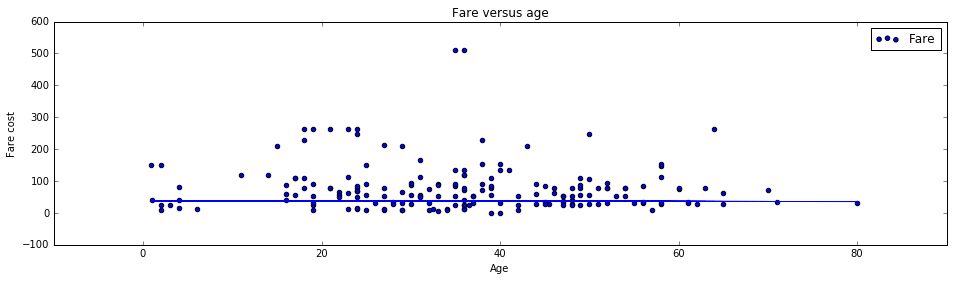

In [62]:
df.dropna(inplace=True)

fare = df.Fare
age = df.Age

plt.figure(figsize=(16, 4))
plt.scatter(age, fare)
plt.legend()
plt.ylabel("Fare cost")
plt.xlabel("Age")
plt.title("Fare versus age")

slope, intercept, r_value, p_value, std_err = linregress(fare,age)
expected = [slope*x+intercept for x in age]
plt.plot(age, expected, '-')
plt.show()

In [63]:
observed = fare
chi_val = chisquare(observed, expected, ddof=3)
print(chi_val)

Power_divergenceResult(statistic=37921.793817156242, pvalue=0.0)
